In [127]:
import numpy as np
from sklearn.datasets import make_blobs
import plotly.express as px
from sklearn.model_selection import train_test_split
import plotly
import matplotlib.pyplot as plt

This code is written by me from a machine learning project from MIT course. It deals with the linear classifiers and the steps required to tune and validate model accuracies

In [41]:
#Perceptron algorithm
def perceptron_single_step_update(feature_vector, label, current_theta, current_theta_0):
    if label*(np.dot(current_theta, feature_vector) + current_theta_0) <= 0.:
        current_theta += label*feature_vector
        current_theta_0 += label

    return current_theta, current_theta_0

def perceptron(feature_matrix, labels, T):
    theta = np.zeros(feature_matrix.shape[1])
    theta_0 = 0.
    for t in range(T):
        for i in range(feature_matrix.shape[0]):
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i, :],
                labels[i], theta, theta_0)
    return theta, theta_0

In [40]:
#Average perceptron algorithm
def average_perceptron(feature_matrix, labels, T):
    theta = np.zeros(feature_matrix.shape[1])
    theta_0 = 0.

    thetas_sum  = np.zeros(feature_matrix.shape[1])
    theta_0_sum = 0.
    Count = 0
    for t in range(T):
        for i in range(feature_matrix.shape[0]):
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i, :], labels[i], theta, theta_0)
            thetas_sum += theta
            theta_0_sum += theta_0
            Count += 1
    return thetas_sum/Count, theta_0_sum/Count

In [42]:
#Pegasos algorithm
def pegasos_single_step_update(feature_vector, label, L, eta, current_theta, current_theta_0):
        if label*(np.dot(current_theta, feature_vector) + current_theta_0) <= 1.:
            current_theta = (1.-eta*L)*current_theta + eta*label*feature_vector
            current_theta_0 += label*eta
        else:
            current_theta = (1.-eta*L)*current_theta
        return current_theta, current_theta_0
    
def pegasos(feature_matrix, labels, T, L):
    theta = np.zeros(feature_matrix.shape[1])
    theta_0 = 0.
    Counter = 0
    for t in range(T):
        for i in range(feature_matrix.shape[0]):
            Counter +=1
            theta, theta_0 = pegasos_single_step_update(feature_matrix[i, :],labels[i],L,
                1/np.sqrt(Counter),theta, theta_0)

    return theta, theta_0

In [6]:
#General classify algorithm for both perceptron and pegasos algorithms
def classify(feature_matrix, theta, theta_0):
    Classification = np.array([np.sign(np.dot(theta, feature_vector) + theta_0) for feature_vector in feature_matrix])
    Classification[Classification == 0] = -1
    return Classification

In [8]:
#Classifier accuracy
def classifier_accuracy(classifier, train_feature_matrix, val_feature_matrix, train_labels, val_labels, **kwargs):
    theta, theta_0 = classifier(train_feature_matrix, train_labels, **kwargs)
    train_Classification = classify(train_feature_matrix, theta, theta_0)
    val_Classification = classify(val_feature_matrix, theta, theta_0)
    
    return np.mean(train_Classification == train_labels), np.mean(val_Classification == val_labels)

In [78]:
n = 2000
X, y = make_blobs(n_samples=n, n_features=2, random_state=0, centers = [(-1, -1), (1, 1)])
y[y == 0] = -1
for i in range(n):
    X[i, 1] += 1.

In [79]:
fig = px.scatter(x=X[:, 0], y=X[:, 1], color = y)
fig.show()

In [80]:
#Splitting the dataset into train, valid and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [88]:
def TunePerceptron(X_train, X_valid, y_train, y_valid):
    t = np.arange(1, 100, 1)
    Best_Validation_Accuracy = 0.
    Best_Train_Accuracy = 0.
    Best_T = 0
    Best_Theta = np.zeros(X_train.shape[1])
    Best_Theta_0 = 0.
    for T in t:
        theta, theta_0 = perceptron(X_train, y_train, T)
        Train_Acc, Valid_Acc = classifier_accuracy(perceptron, X_train, X_valid, y_train, y_valid, T = T)
        #print(T, Train_Acc, Valid_Acc)
        if Valid_Acc > Best_Validation_Accuracy:
            Best_Validation_Accuracy = Valid_Acc
            Best_Train_Accuracy = Train_Acc
            Best_T = T
            Best_Theta = theta
            Best_Theta_0 = theta_0
            print("Best parameters so far(T, Theta, Theta_0): ", Best_T, Best_Theta, Best_Theta_0, 'with valid accuracy: ', Best_Validation_Accuracy
                 , 'and training accuracy: ', Best_Train_Accuracy)
    return Best_T, Best_Theta, Best_Theta_0

In [89]:
Best_T, Best_Theta, Best_Theta_0 = TunePerceptron(X_train, X_valid, y_train, y_valid)

Best parameters so far(T, Theta, Theta_0):  1 [1.53178289 5.20162094] -1.0 with valid accuracy:  0.8465011286681715 and training accuracy:  0.8160535117056856
Best parameters so far(T, Theta, Theta_0):  2 [1.59591245 3.10492896] -2.0 with valid accuracy:  0.9187358916478555 and training accuracy:  0.8773690078037905
Best parameters so far(T, Theta, Theta_0):  5 [1.77057053 3.18510489] -2.0 with valid accuracy:  0.9255079006772009 and training accuracy:  0.8840579710144928
Best parameters so far(T, Theta, Theta_0):  33 [2.11139039 3.81752382] -3.0 with valid accuracy:  0.927765237020316 and training accuracy:  0.9007803790412486


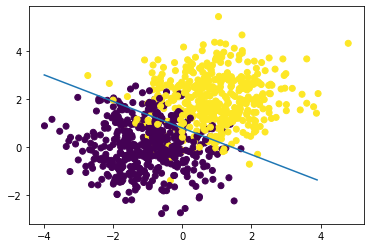

In [136]:
x = np.arange(-4, 4, .1)
y = [(-Best_Theta_0-Best_Theta[0]*X)/Best_Theta[1] for X in x]

fig = plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.plot(x, y)

Accuracy on the test set is:  0.9318181818181818


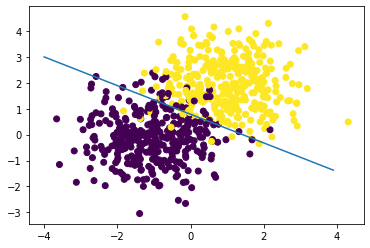

In [140]:
x = np.arange(-4, 4, .1)
y = [(-Best_Theta_0-Best_Theta[0]*X)/Best_Theta[1] for X in x]

fig = plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
plt.plot(x, y)

Classification = classify(X_test, Best_Theta, Best_Theta_0)
print("Accuracy on the test set is: ", (y_test == Classification).mean())